In [1]:
!git clone https://github.com/AGiannoutsos/Latent_vs_Original_Space_Image_Classification.git
%cd Latent_vs_Original_Space_Image_Classification/

Cloning into 'Latent_vs_Original_Space_Image_Classification'...
remote: Enumerating objects: 89, done.
remote: Total 89 (delta 0), reused 0 (delta 0), pack-reused 89
Unpacking objects: 100% (89/89), done.
/content/Latent_vs_Original_Space_Image_Classification


# Experiments and research for the best model

Experiments different autoencoder architectures to extract the best latent representation.

In [2]:
import keras
import numpy as np
from autoencoder.model import get_Autoencoder, train_Autoencoder
from autoencoder.visualization import autoencoder_visualization
from reduce import load_mnist
from keras.utils import to_categorical, normalize
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Loading data from dataset and convertto one hot vectors

In [3]:
# Reading training and test sets
datasetFile = "/content/Latent_vs_Original_Space_Image_Classification/data/train-images-idx3-ubyte"
dlabelsFile = "/content/Latent_vs_Original_Space_Image_Classification/data/train-labels-idx1-ubyte"
testsetFile = "/content/Latent_vs_Original_Space_Image_Classification/data/t10k-images-idx3-ubyte"
tlabelsFile = "/content/Latent_vs_Original_Space_Image_Classification/data/t10k-labels-idx1-ubyte"

train_X = load_mnist(datasetFile, type='data')[0:]
train_Y = load_mnist(dlabelsFile, type='labels')[0:]
test_X  = load_mnist(testsetFile, type='data')[0:]
test_Y  = load_mnist(tlabelsFile, type='labels')[0:]

# one hot vectors
train_Y = to_categorical(train_Y)
test_Y  = to_categorical(test_Y)

# normalize
train_X = normalize(train_X)
test_X  = normalize(test_X)
input_shape = train_X.shape[1:]
num_of_classes = train_Y.shape[1]

print(train_X.shape, train_Y.shape[1])

(60000, 28, 28, 1) 10


# Autoencoder testing

In [4]:
autoencoder_experiment_histories = []

## Small Model testing

### Default Small Model

Epoch 1/30
1688/1688 [==============================] - 15s 4ms/step - loss: 0.0606 - val_loss: 0.0307
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0301 - val_loss: 0.0289
Epoch 3/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0281 - val_loss: 0.0273
Epoch 4/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0269 - val_loss: 0.0263
Epoch 5/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0262 - val_loss: 0.0259
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0257 - val_loss: 0.0257
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0252 - val_loss: 0.0252
Epoch 8/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0248 - val_loss: 0.0249
Epoch 9/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0246 - val_loss: 0.0247
Epoch 10/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.02

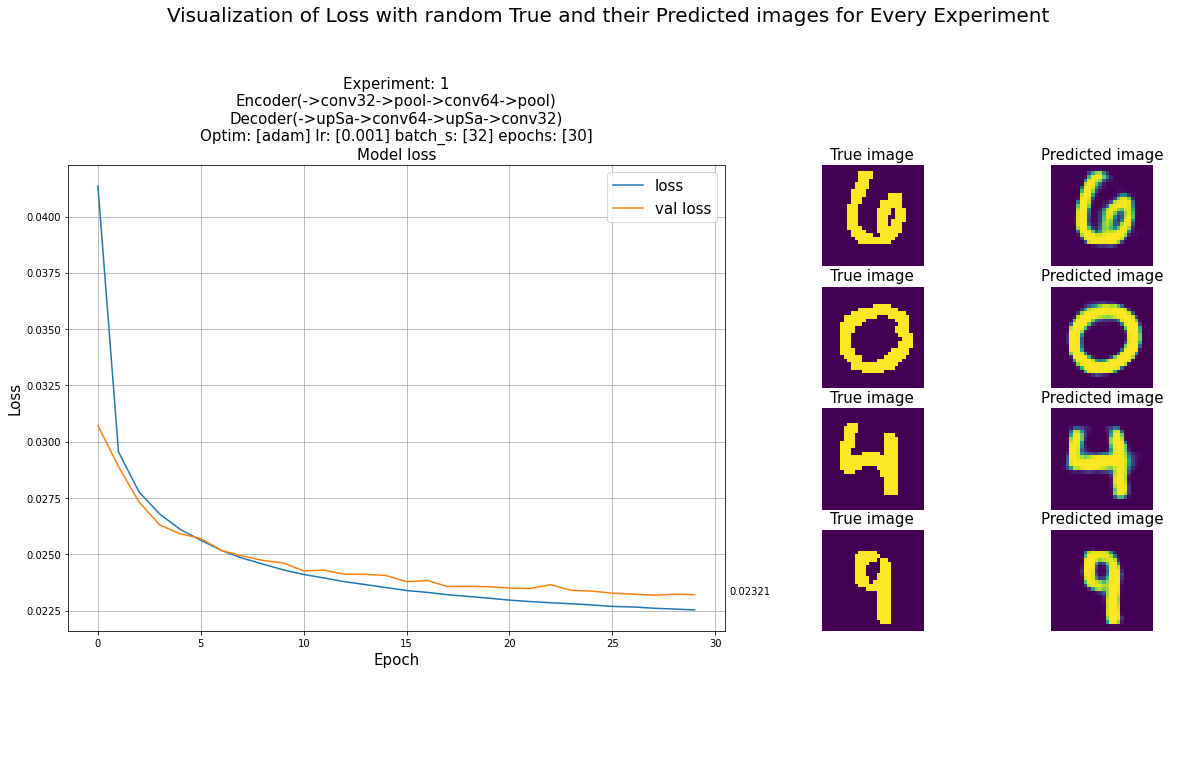

In [5]:
small_model_histories = []
small_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)]]
                    ,
                    "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
small_model = get_Autoencoder(small_model_info, input_shape)
# train it
small_model_history = train_Autoencoder(small_model, small_model_info, train_X)
# save it
small_model_histories.append(small_model_history)
# plot it
_ = autoencoder_visualization([small_model_history], test_X)

This is a simple auto encoder model with only 32 and 64 filters

Convergence is fast and the error is very small. Therefore no further test is needed

Add the best compination of hyperparametrs for the medium model in the autoencoder experiments list

and save it

In [6]:
autoencoder_experiment_histories.append(small_model_histories[0])
small_model_histories[0].model.save("small_model.h5")

## Medium Model testing

### Default Medium Model

Epoch 1/30
1688/1688 [==============================] - 10s 5ms/step - loss: 0.0559 - val_loss: 0.0264
Epoch 2/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0259 - val_loss: 0.0244
Epoch 3/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0239 - val_loss: 0.0233
Epoch 4/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0228 - val_loss: 0.0227
Epoch 5/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0220 - val_loss: 0.0222
Epoch 6/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0215 - val_loss: 0.0224
Epoch 7/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0210 - val_loss: 0.0213
Epoch 8/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0207 - val_loss: 0.0211
Epoch 9/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0204 - val_loss: 0.0212
Epoch 10/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.02

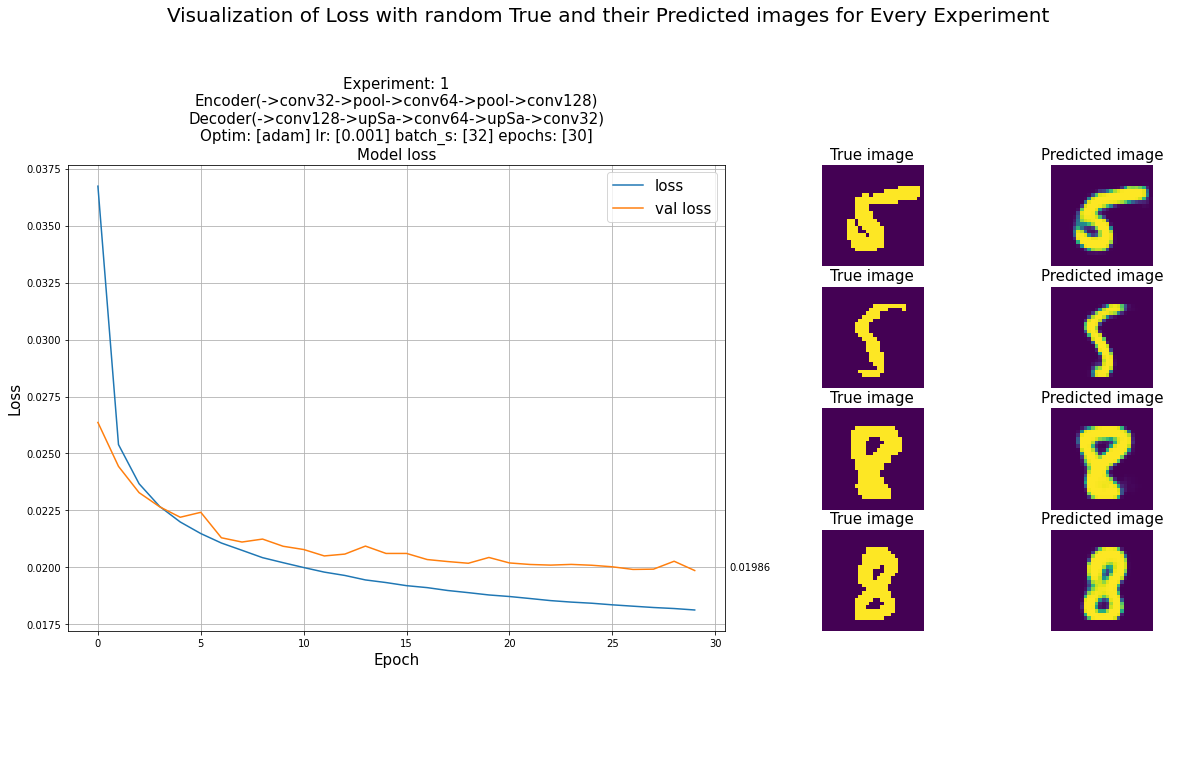

In [7]:
medium_model_histories = []
medium_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)]]
                    ,
                     "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["conv", 128, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
medium_model = get_Autoencoder(medium_model_info, input_shape)
# train it
medium_model_history = train_Autoencoder(medium_model, medium_model_info, train_X)
# save it
medium_model_histories.append(medium_model_history)
# plot it
_ = autoencoder_visualization([medium_model_history], test_X)

The model is overfitting so we will try a smaller learning rate so it will not converge so fast and prevent it from overfitting.

### Medium Model with smaller learning rate

Epoch 1/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0862 - val_loss: 0.0377
Epoch 2/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0364 - val_loss: 0.0335
Epoch 3/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0331 - val_loss: 0.0312
Epoch 4/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0309 - val_loss: 0.0299
Epoch 5/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0295 - val_loss: 0.0287
Epoch 6/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0286 - val_loss: 0.0279
Epoch 7/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0277 - val_loss: 0.0272
Epoch 8/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0271 - val_loss: 0.0265
Epoch 9/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0264 - val_loss: 0.0261
Epoch 10/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.02

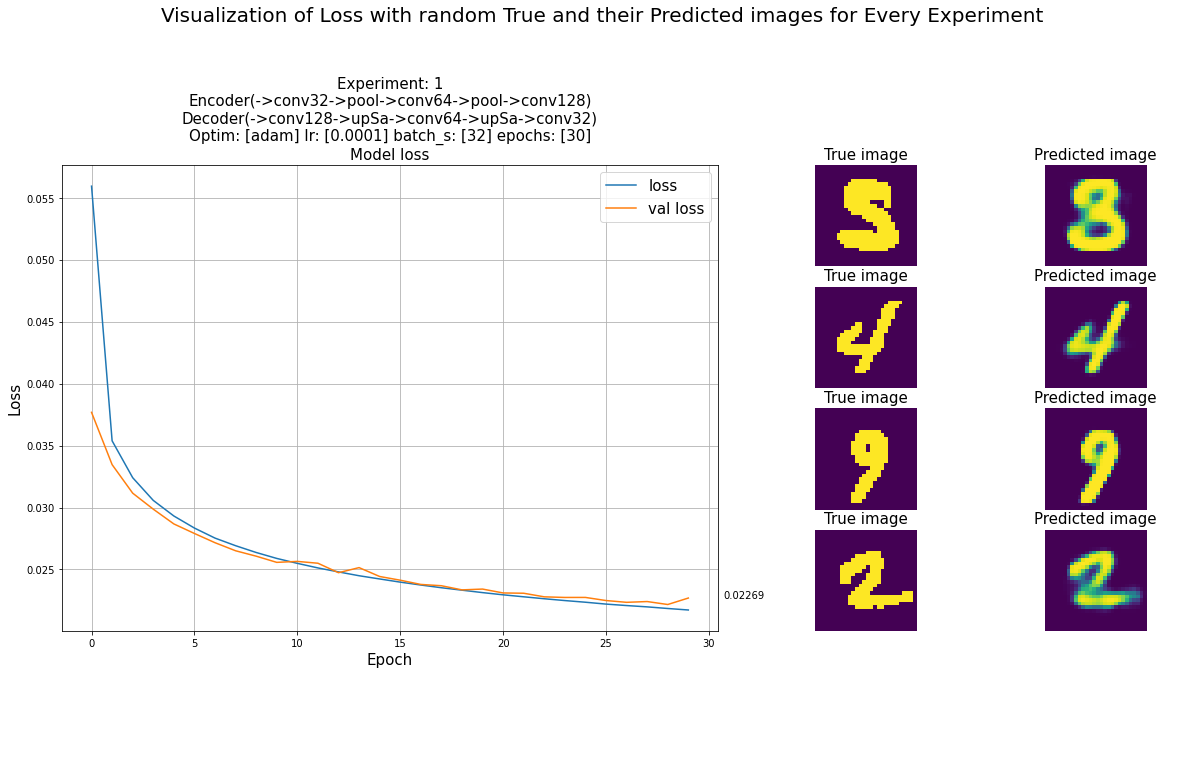

In [8]:
medium_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)]]
                    ,
                     "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["conv", 128, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
medium_model = get_Autoencoder(medium_model_info, input_shape)
# train it
medium_model_history = train_Autoencoder(medium_model, medium_model_info, train_X)
# save it
medium_model_histories.append(medium_model_history)
# plot it
_ = autoencoder_visualization([medium_model_history], test_X)

### Training for more epochs

Epoch 1/60
1688/1688 [==============================] - 10s 5ms/step - loss: 0.0908 - val_loss: 0.0387
Epoch 2/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0366 - val_loss: 0.0333
Epoch 3/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0329 - val_loss: 0.0313
Epoch 4/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0311 - val_loss: 0.0307
Epoch 5/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0296 - val_loss: 0.0286
Epoch 6/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0286 - val_loss: 0.0292
Epoch 7/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0278 - val_loss: 0.0272
Epoch 8/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0271 - val_loss: 0.0267
Epoch 9/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0266 - val_loss: 0.0263
Epoch 10/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.02

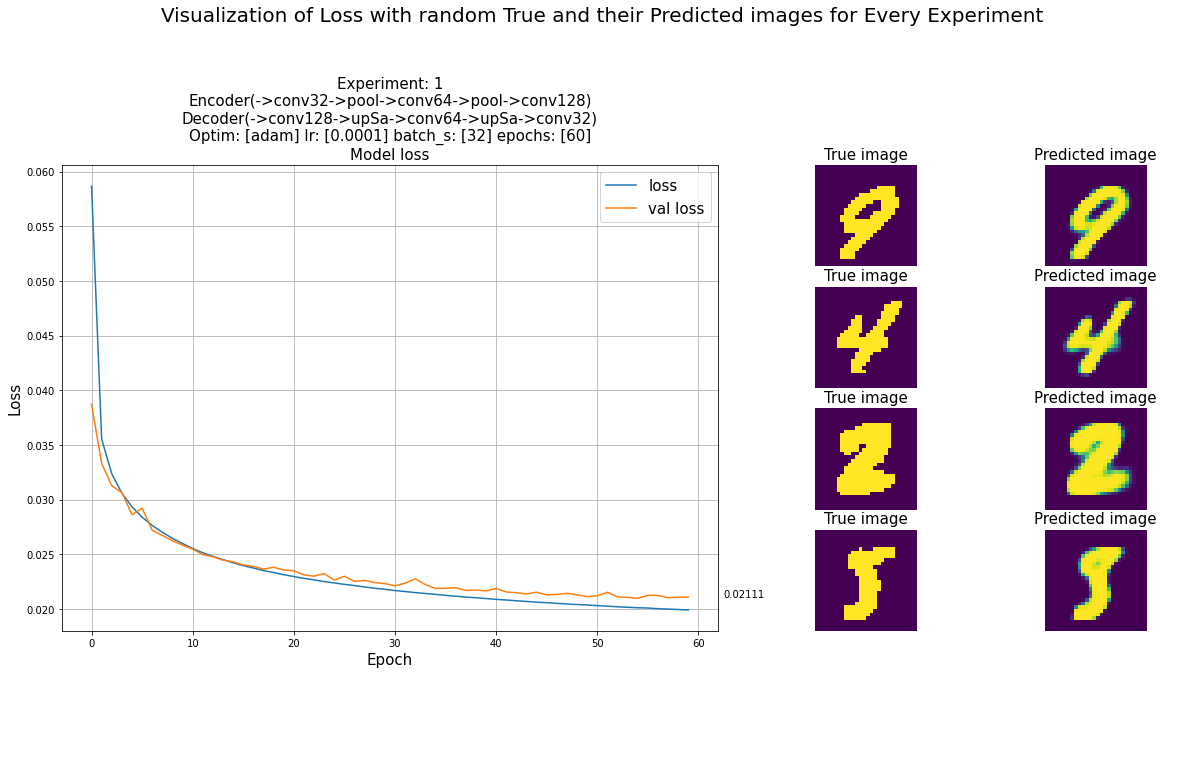

In [9]:
medium_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["conv", 128, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["upSample", (2,2)],
                                        ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          60
                    }
# get model
medium_model = get_Autoencoder(medium_model_info, input_shape)
# train it
medium_model_history = train_Autoencoder(medium_model, medium_model_info, train_X)
# save it
medium_model_histories.append(medium_model_history)
# plot it
_ = autoencoder_visualization([medium_model_history], test_X)

### Medium Models experiments overview




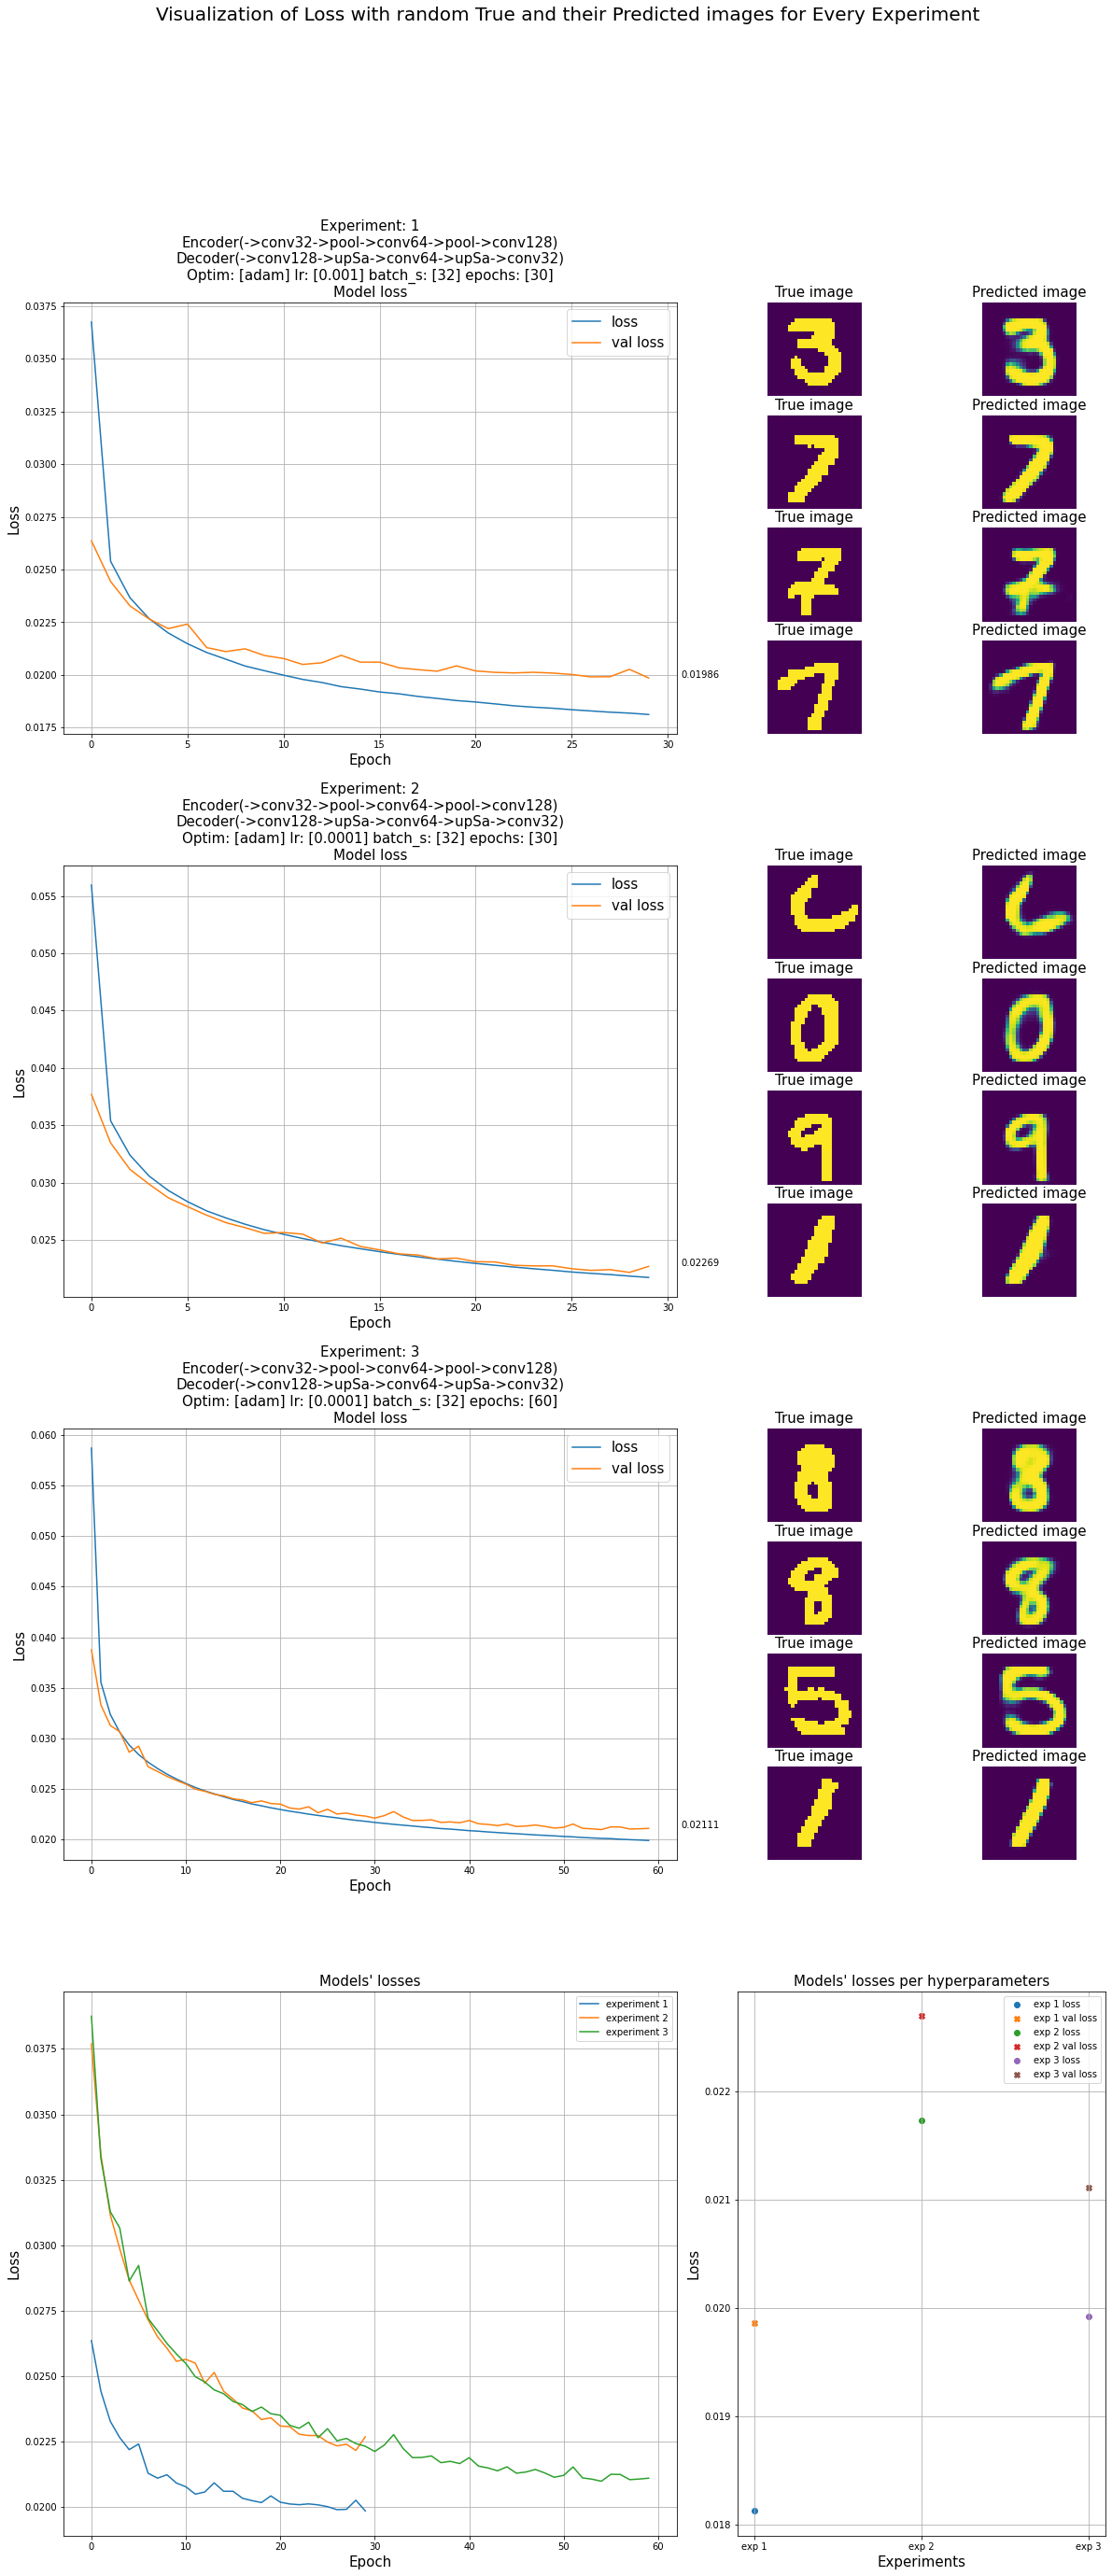

In [11]:
_ = autoencoder_visualization(medium_model_histories, test_X)

This model at first did not converge so it was necessary to reduce learning rate
After the reduction, the model converged normally and most of the epochs did not help

However, we will choose this with the smallest error and overfitts the less which is the 3rd experiment

Add the best compination of hyperparametrs for the medium model in the autoencoder experiments list

and save it


In [12]:
autoencoder_experiment_histories.append(medium_model_histories[2])
medium_model_histories[2].model.save("medium_model.h5")

## Large Model testing

### Default Large Model

Epoch 1/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1918 - val_loss: 0.1912
Epoch 2/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1912 - val_loss: 0.1912
Epoch 3/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1915 - val_loss: 0.1912
Epoch 4/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1916 - val_loss: 0.1912
Epoch 5/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1916 - val_loss: 0.1912
Epoch 6/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1913 - val_loss: 0.1912
Epoch 7/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1909 - val_loss: 0.1912
Epoch 8/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1912 - val_loss: 0.1912
Epoch 9/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1914 - val_loss: 0.1912
Epoch 10/30
1688/1688 [==============================] - 11s 7ms/step - l

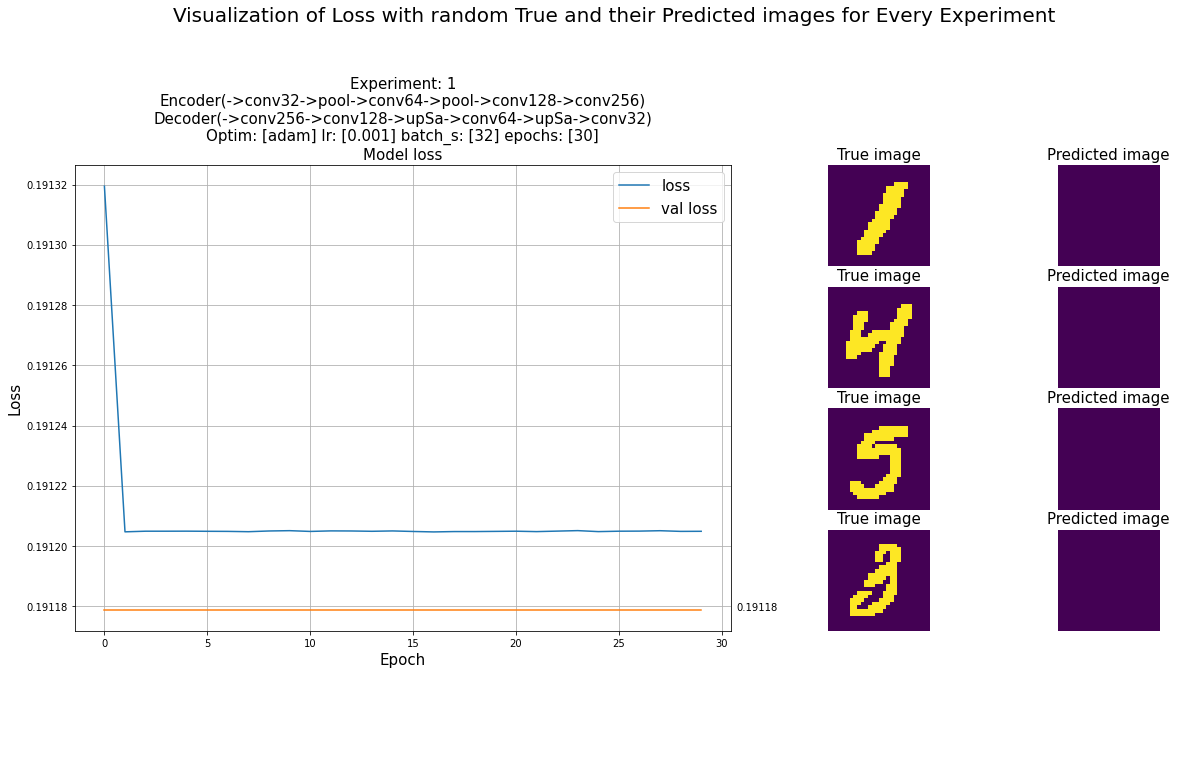

In [10]:
large_model_histories = []
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

This model does not converge so we will reduce the learning rate.

### Large Model with smaller learning rate

Epoch 1/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0841 - val_loss: 0.0336
Epoch 2/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0323 - val_loss: 0.0297
Epoch 3/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0292 - val_loss: 0.0276
Epoch 4/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0275 - val_loss: 0.0268
Epoch 5/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0264 - val_loss: 0.0257
Epoch 6/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0254 - val_loss: 0.0252
Epoch 7/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0245 - val_loss: 0.0252
Epoch 8/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0238 - val_loss: 0.0237
Epoch 9/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0232 - val_loss: 0.0233
Epoch 10/30
1688/1688 [==============================] - 11s 7ms/step - l

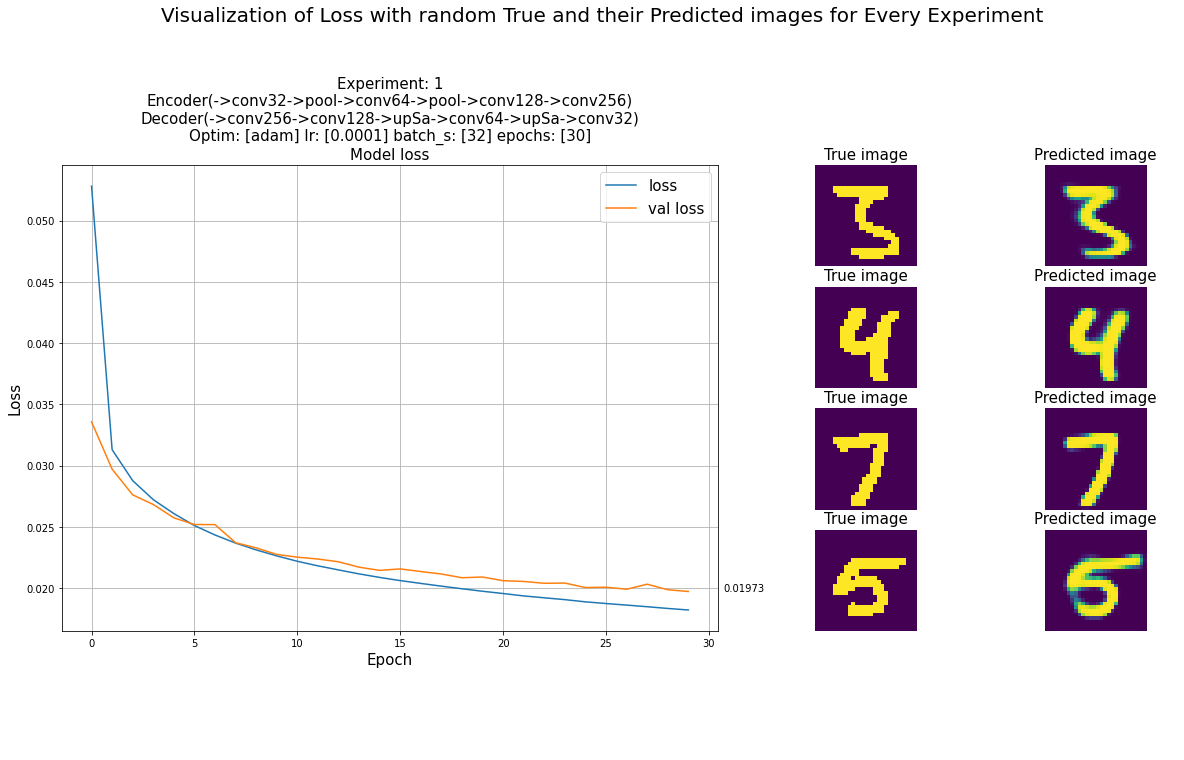

In [13]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

The model is overfitting so we will add some dropout to reduce it

### Large Model with dropout

Epoch 1/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0889 - val_loss: 0.0345
Epoch 2/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0339 - val_loss: 0.0297
Epoch 3/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0301 - val_loss: 0.0272
Epoch 4/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0279 - val_loss: 0.0259
Epoch 5/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0266 - val_loss: 0.0250
Epoch 6/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0256 - val_loss: 0.0254
Epoch 7/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0248 - val_loss: 0.0246
Epoch 8/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0241 - val_loss: 0.0241
Epoch 9/30
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0237 - val_loss: 0.0229
Epoch 10/30
1688/1688 [==============================] - 12s 7ms/step - l

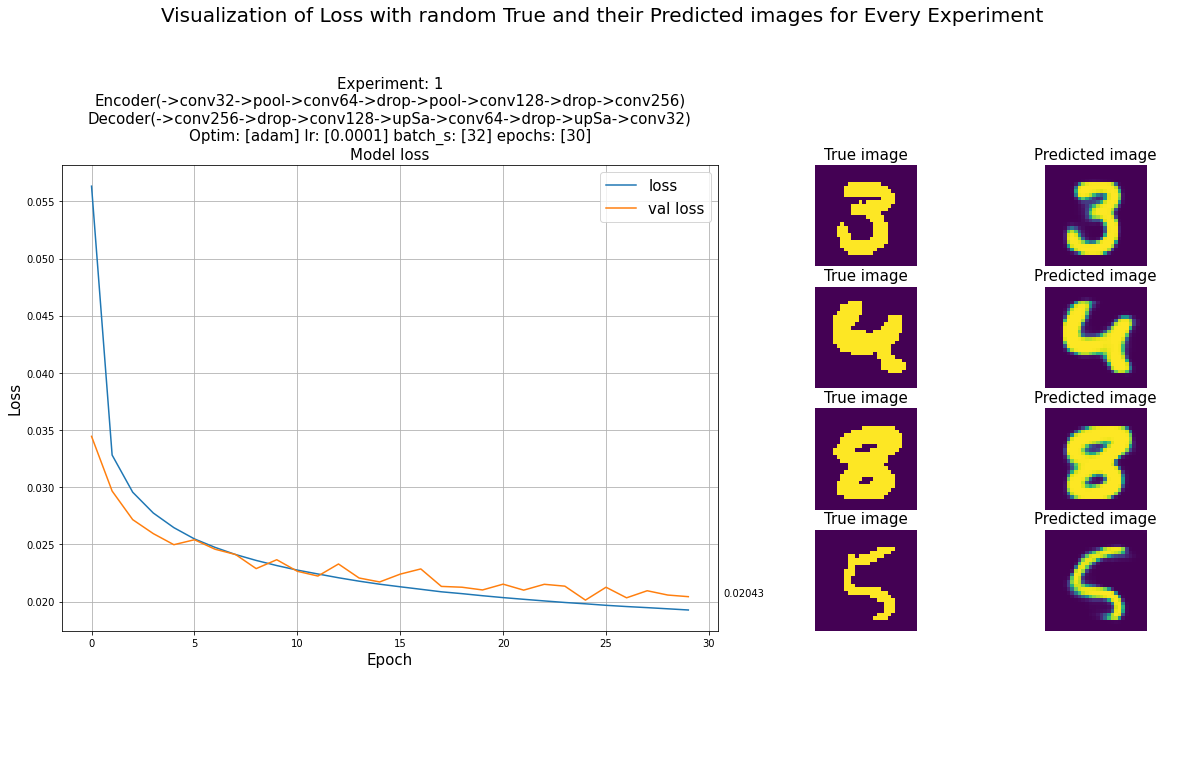

In [14]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["drop", 0.1],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["drop", 0.1],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["drop", 0.1],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["drop", 0.1],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          30
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

### Large Model with more epochs and dropout

Epoch 1/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0834 - val_loss: 0.0328
Epoch 2/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0327 - val_loss: 0.0285
Epoch 3/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0292 - val_loss: 0.0270
Epoch 4/50
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0275 - val_loss: 0.0259
Epoch 5/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0261 - val_loss: 0.0246
Epoch 6/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0251 - val_loss: 0.0239
Epoch 7/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0244 - val_loss: 0.0233
Epoch 8/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0237 - val_loss: 0.0229
Epoch 9/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0232 - val_loss: 0.0225
Epoch 10/50
1688/1688 [==============================] - 11s 7ms/step - l

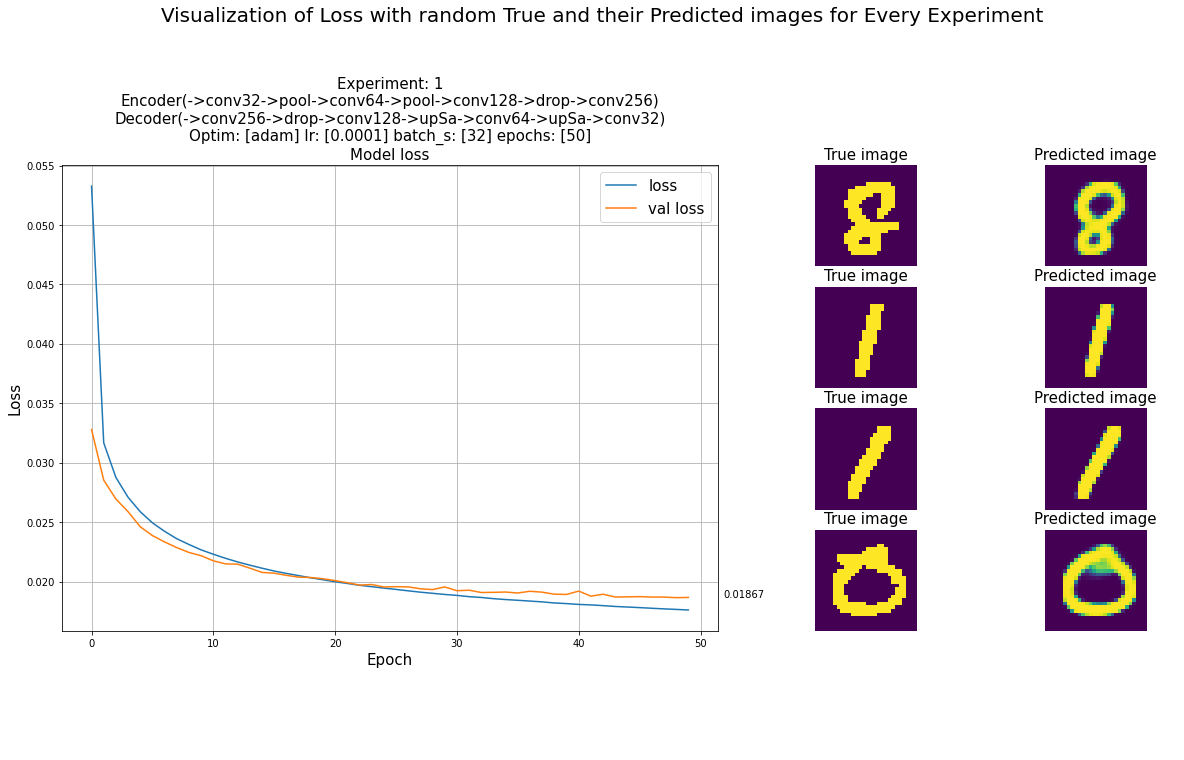

In [15]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["drop", 0.1],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["drop", 0.1],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          50
                    }
# get model
large_model = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(large_model, large_model_info, train_X)
# save it
large_model_histories.append(large_model_history)
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

This model now is not overfitting that much.

### Large Models experiments overview

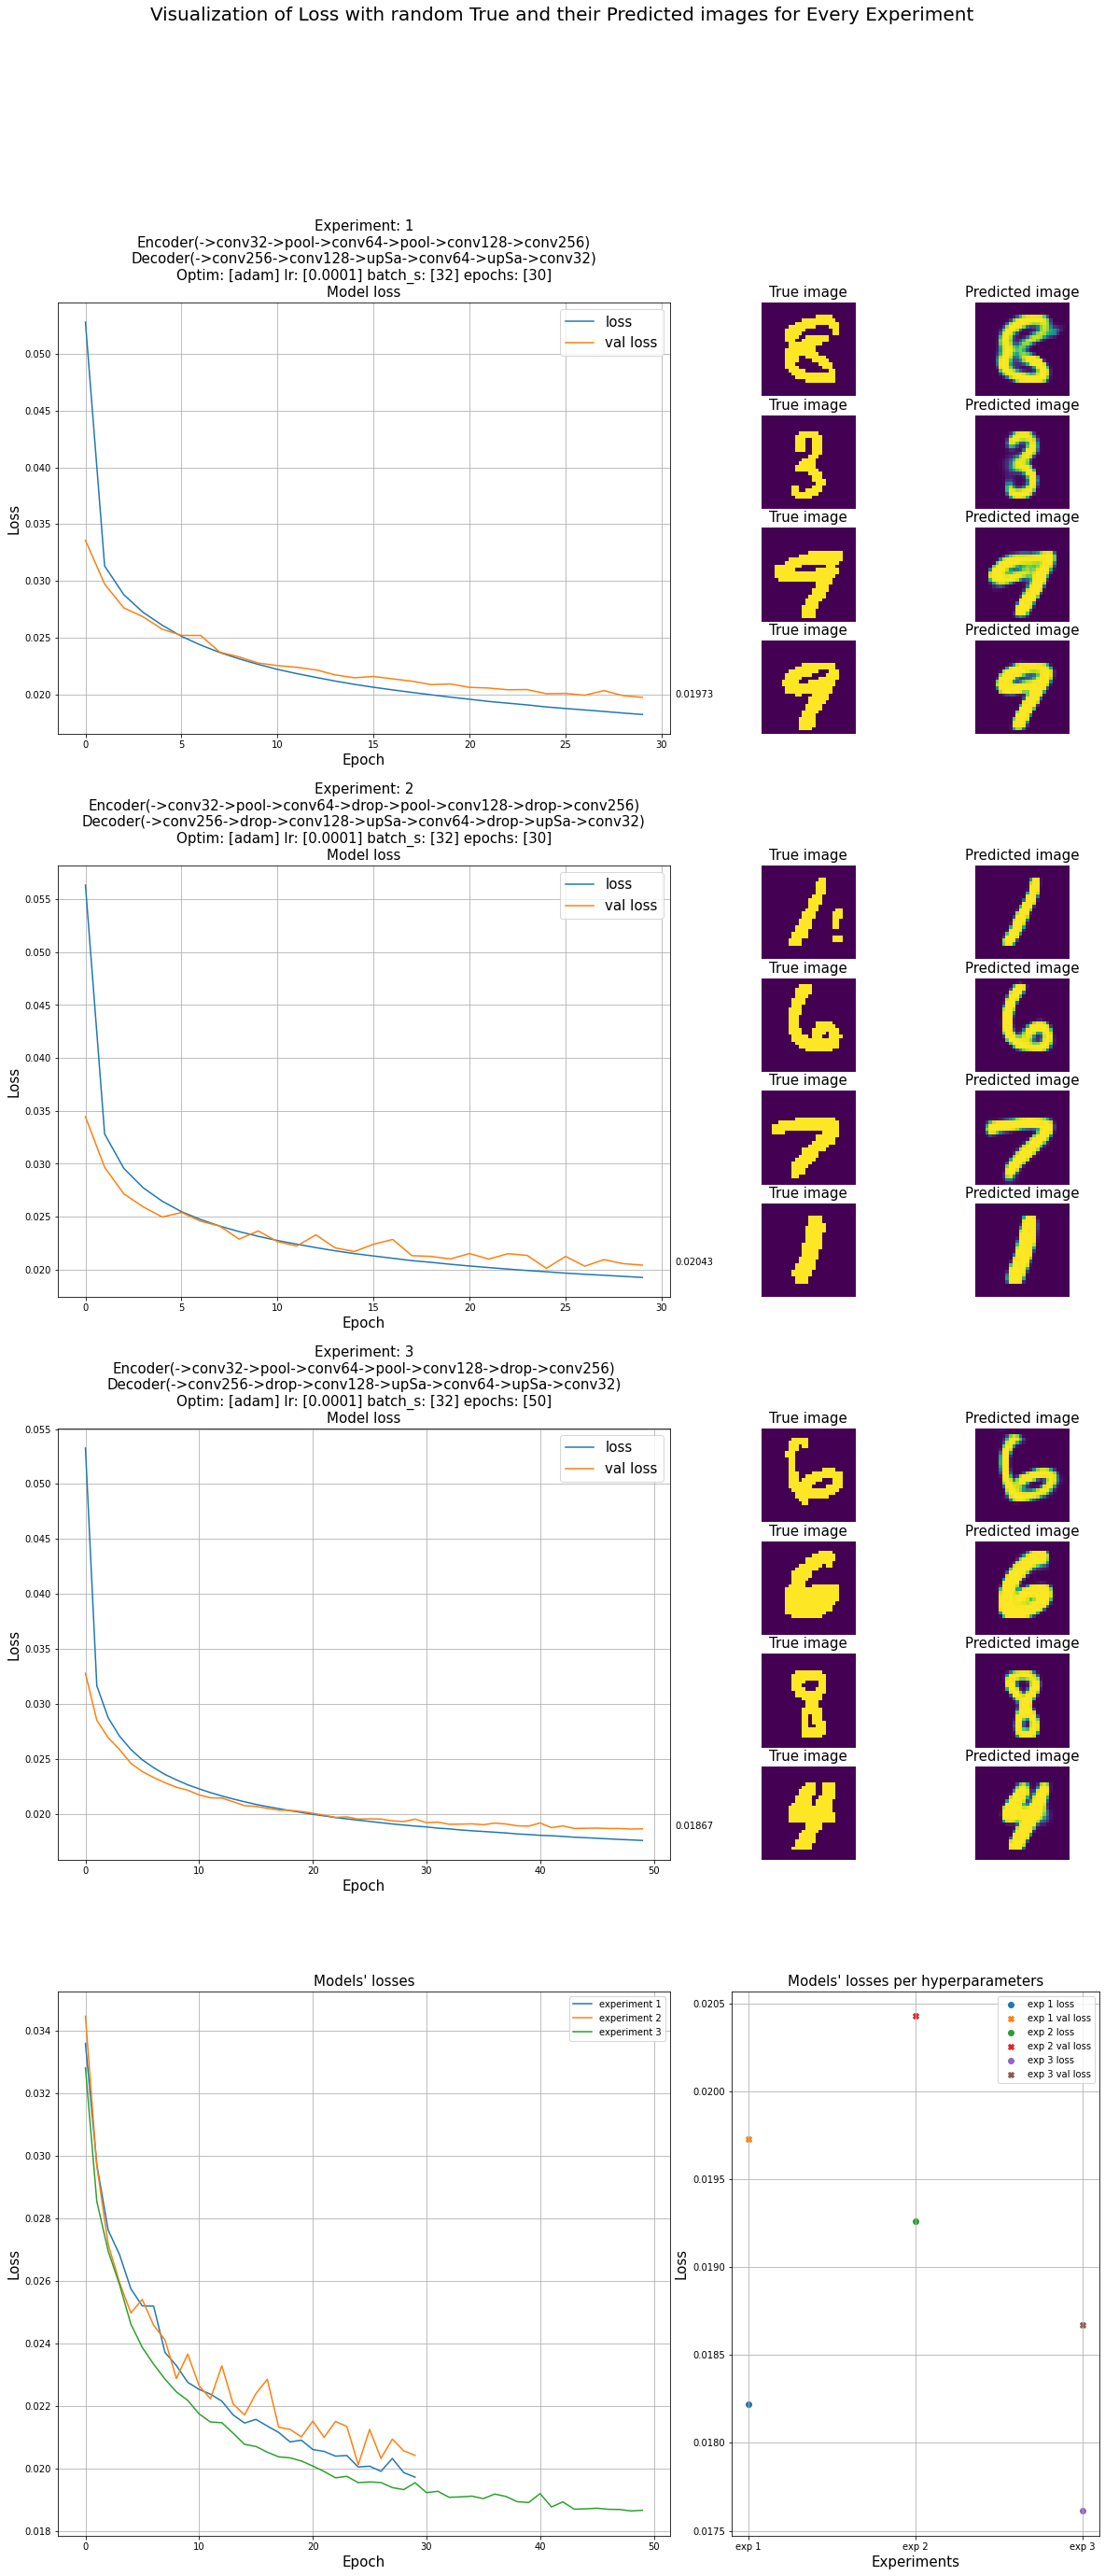

In [17]:
_ = autoencoder_visualization(large_model_histories[1:], test_X)

The larger model was the most difficult to train as its many layers required many operations.

Like the medium model in the beginning wanted a reduction of the learning rate

However, with only 10 dimensions the model was overfitting so we added dropout. So the best model will be tha last ecperiment

Add the best compination of hyperparametrs for the large model in the autoencoder experiments list

and save it

In [18]:
autoencoder_experiment_histories.append(large_model_histories[-1])
large_model_histories[-1].model.save("large_model.h5")

## Autoencoder Models Overview

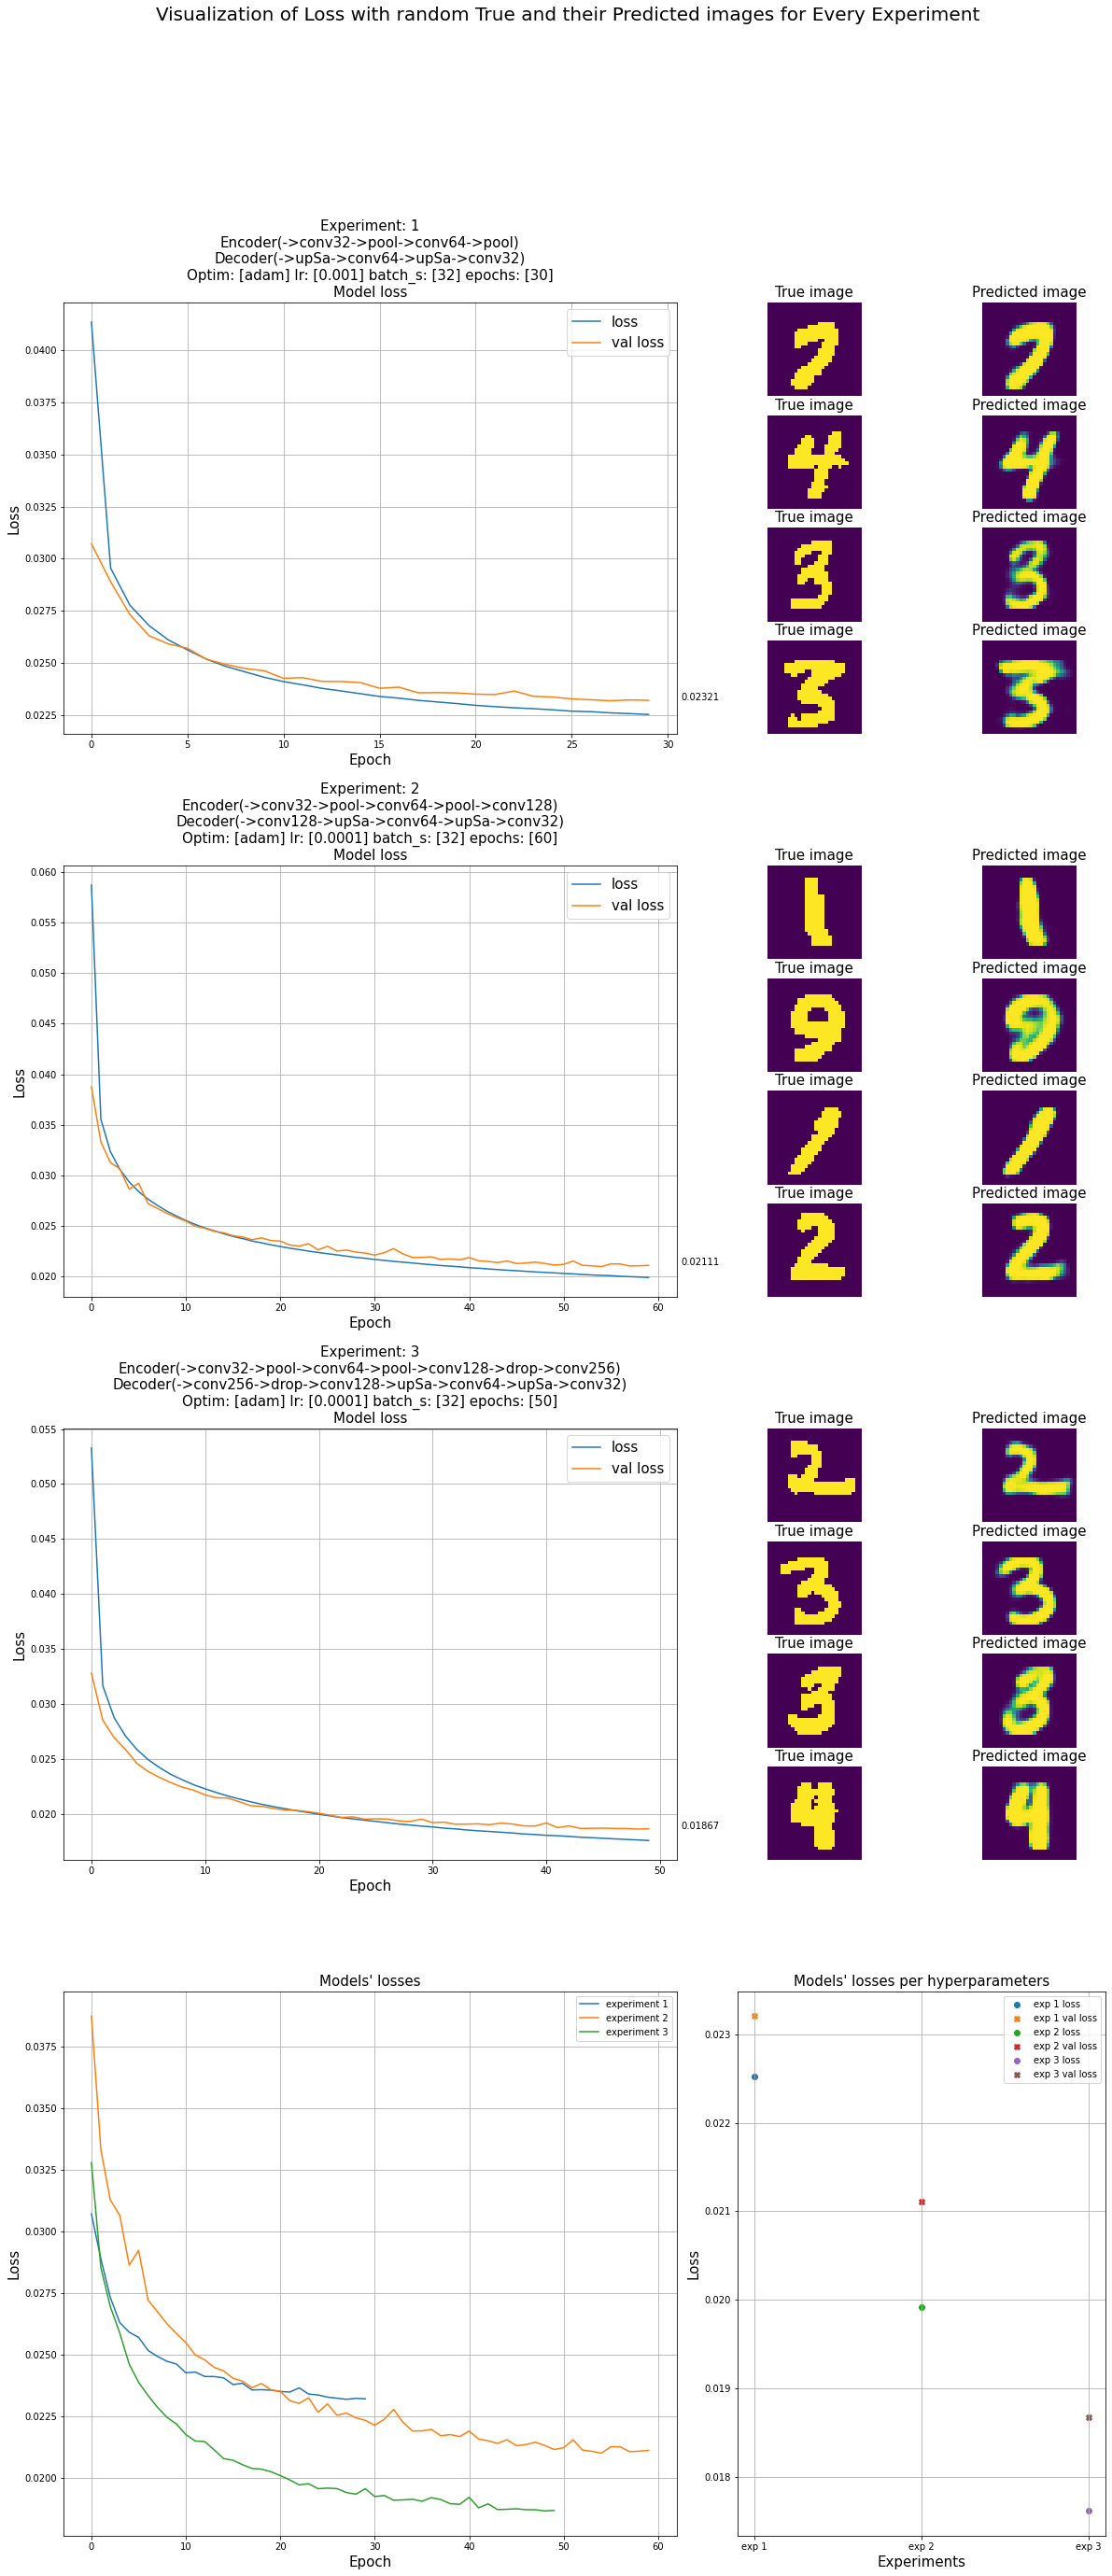

In [19]:
_ = autoencoder_visualization(autoencoder_experiment_histories, test_X)

The best model is the large one with the most parameters. The more the parameters the more information it can train on.

Now we will use the best large model with different latent distance vectors and save the trained models to use for the comparison with the original space.

# Get the best models for latent representation for various dimensions

## 10

Epoch 1/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0836 - val_loss: 0.0324
Epoch 2/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0325 - val_loss: 0.0281
Epoch 3/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0288 - val_loss: 0.0262
Epoch 4/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0271 - val_loss: 0.0254
Epoch 5/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0258 - val_loss: 0.0243
Epoch 6/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0249 - val_loss: 0.0237
Epoch 7/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0242 - val_loss: 0.0230
Epoch 8/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0234 - val_loss: 0.0227
Epoch 9/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0231 - val_loss: 0.0221
Epoch 10/50
1688/1688 [==============================] - 11s 7ms/step - l

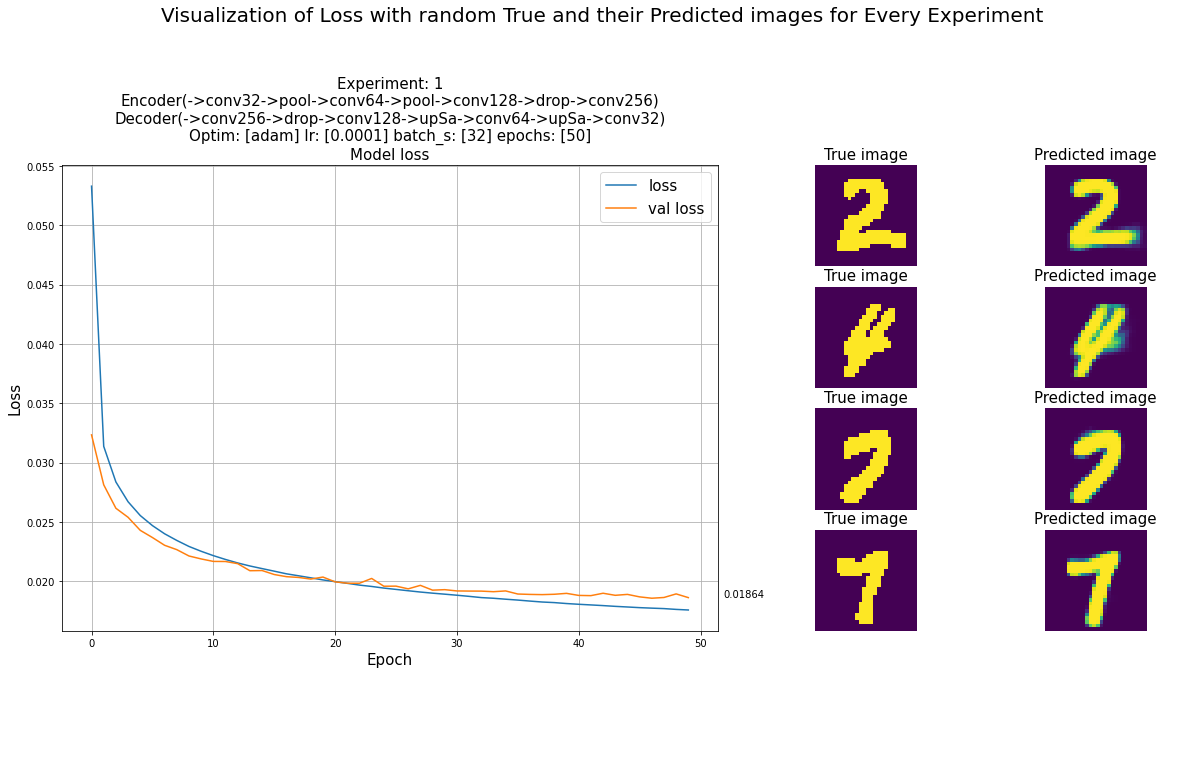

In [20]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["drop", 0.1],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 10]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["drop", 0.1],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          50
                    }
# get model
autoencoder_10 = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(autoencoder_10, large_model_info, train_X)
# save it
autoencoder_10.save("autoencoder_10.h5")
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

## 20

Epoch 1/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0787 - val_loss: 0.0248
Epoch 2/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0236 - val_loss: 0.0184
Epoch 3/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0189 - val_loss: 0.0161
Epoch 4/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0167 - val_loss: 0.0150
Epoch 5/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0154 - val_loss: 0.0143
Epoch 6/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0146 - val_loss: 0.0138
Epoch 7/50
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0139 - val_loss: 0.0131
Epoch 8/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 9/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0131 - val_loss: 0.0126
Epoch 10/50
1688/1688 [==============================] - 11s 7ms/step - l

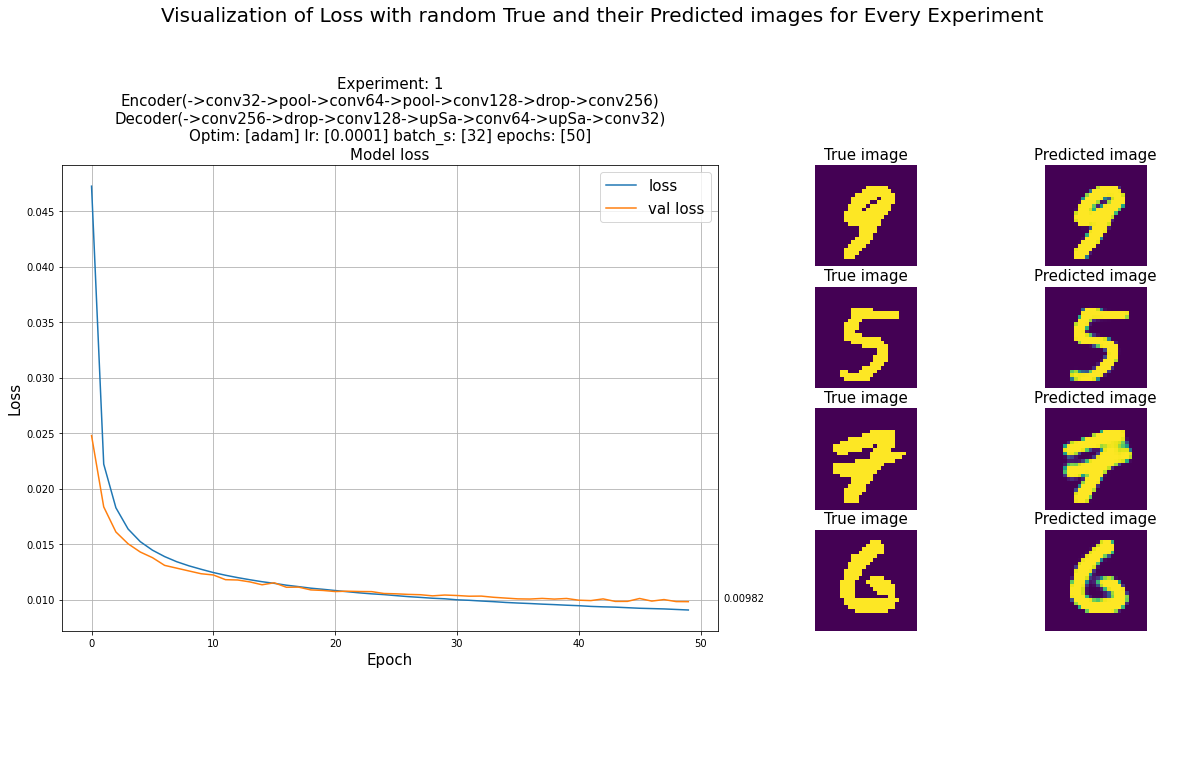

In [21]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["drop", 0.1],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 20]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["drop", 0.1],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          50
                    }
# get model
autoencoder_20 = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(autoencoder_20, large_model_info, train_X)
# save it
autoencoder_20.save("autoencoder_20.h5")
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

## 50

Epoch 1/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0712 - val_loss: 0.0178
Epoch 2/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0171 - val_loss: 0.0135
Epoch 3/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0129 - val_loss: 0.0107
Epoch 4/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 5/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0093 - val_loss: 0.0080
Epoch 6/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0083 - val_loss: 0.0073
Epoch 7/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0075 - val_loss: 0.0066
Epoch 8/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 9/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0065 - val_loss: 0.0058
Epoch 10/50
1688/1688 [==============================] - 12s 7ms/step - l

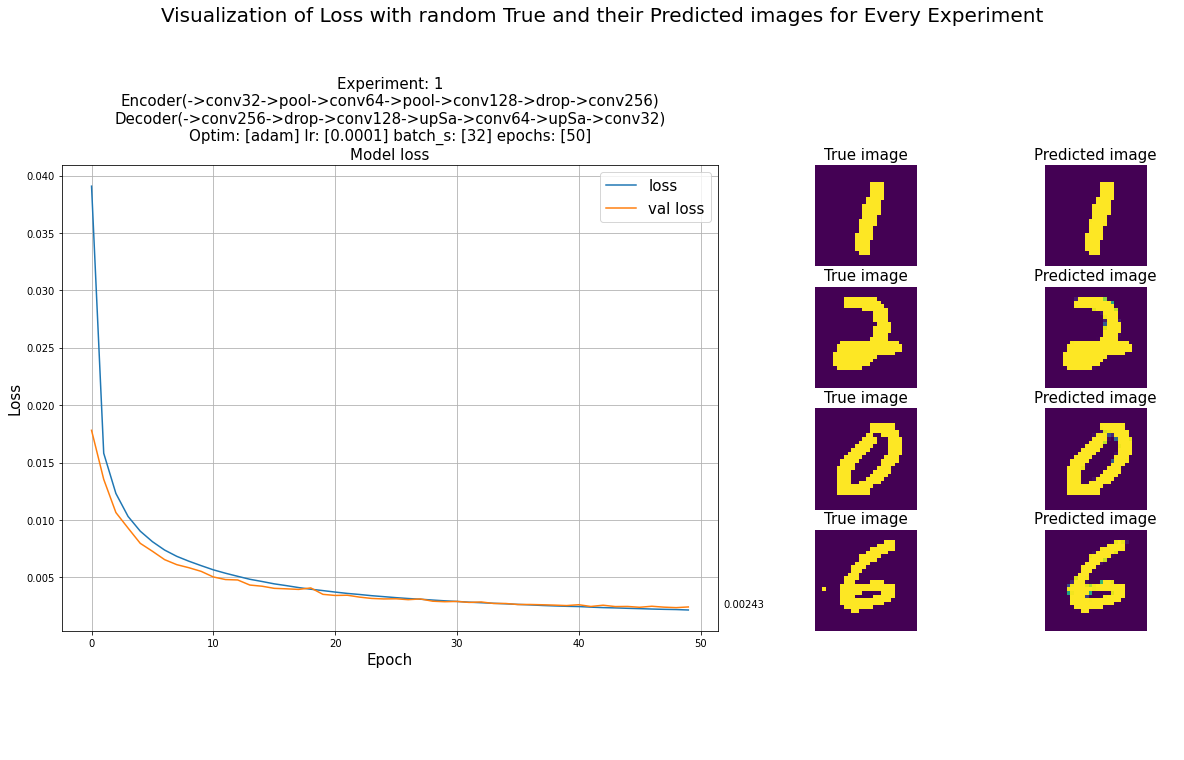

In [22]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["drop", 0.1],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 50]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["drop", 0.1],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          50
                    }
# get model
autoencoder_50 = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(autoencoder_50, large_model_info, train_X)
# save it
autoencoder_50.save("autoencoder_50.h5")
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

## 100

Epoch 1/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0687 - val_loss: 0.0165
Epoch 2/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0156 - val_loss: 0.0121
Epoch 3/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0115 - val_loss: 0.0092
Epoch 4/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0094 - val_loss: 0.0077
Epoch 5/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 6/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 7/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 8/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 9/50
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 10/50
1688/1688 [==============================] - 13s 7ms/step - l

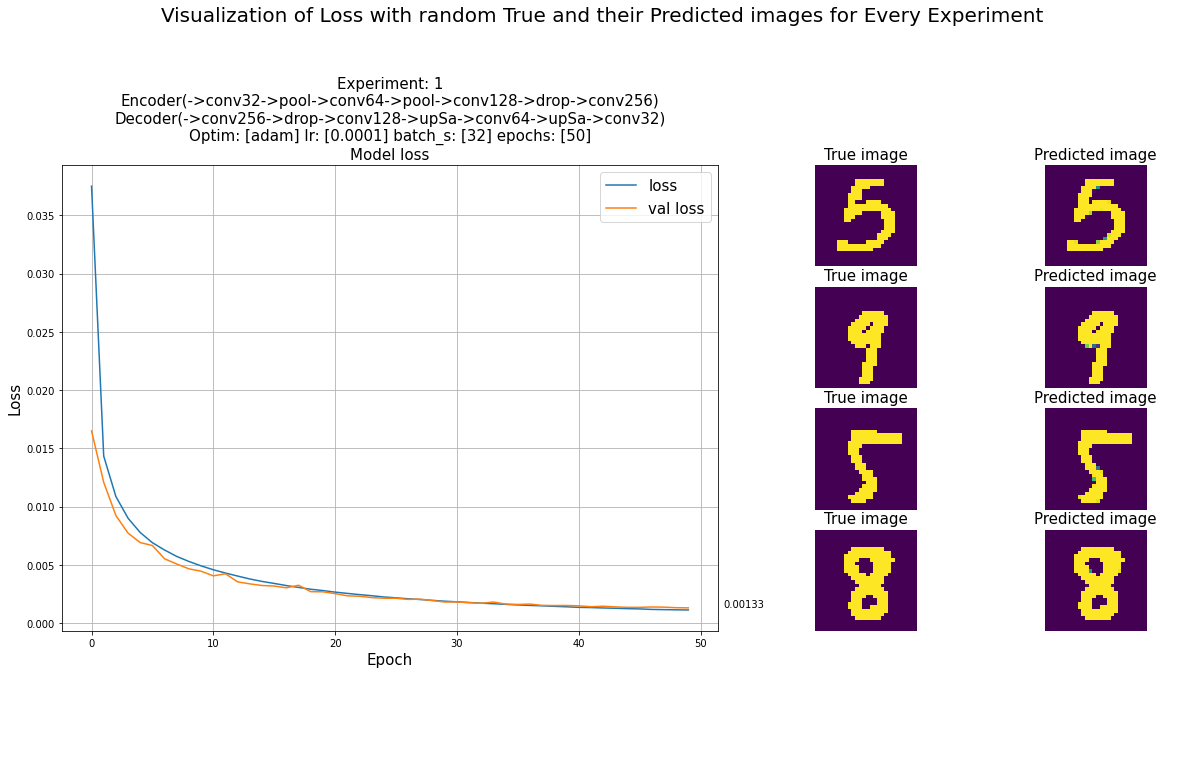

In [23]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["drop", 0.1],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 100]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["drop", 0.1],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          50
                    }
# get model
autoencoder_100 = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(autoencoder_100, large_model_info, train_X)
# save it
autoencoder_100.save("autoencoder_100.h5")
# plot it
_ = autoencoder_visualization([large_model_history], test_X)

## 200

Epoch 1/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0626 - val_loss: 0.0143
Epoch 2/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0135 - val_loss: 0.0099
Epoch 3/50
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0099 - val_loss: 0.0081
Epoch 4/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0081 - val_loss: 0.0067
Epoch 5/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0070 - val_loss: 0.0062
Epoch 6/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 7/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 8/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 9/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 10/50
1688/1688 [==============================] - 14s 8ms/step - l

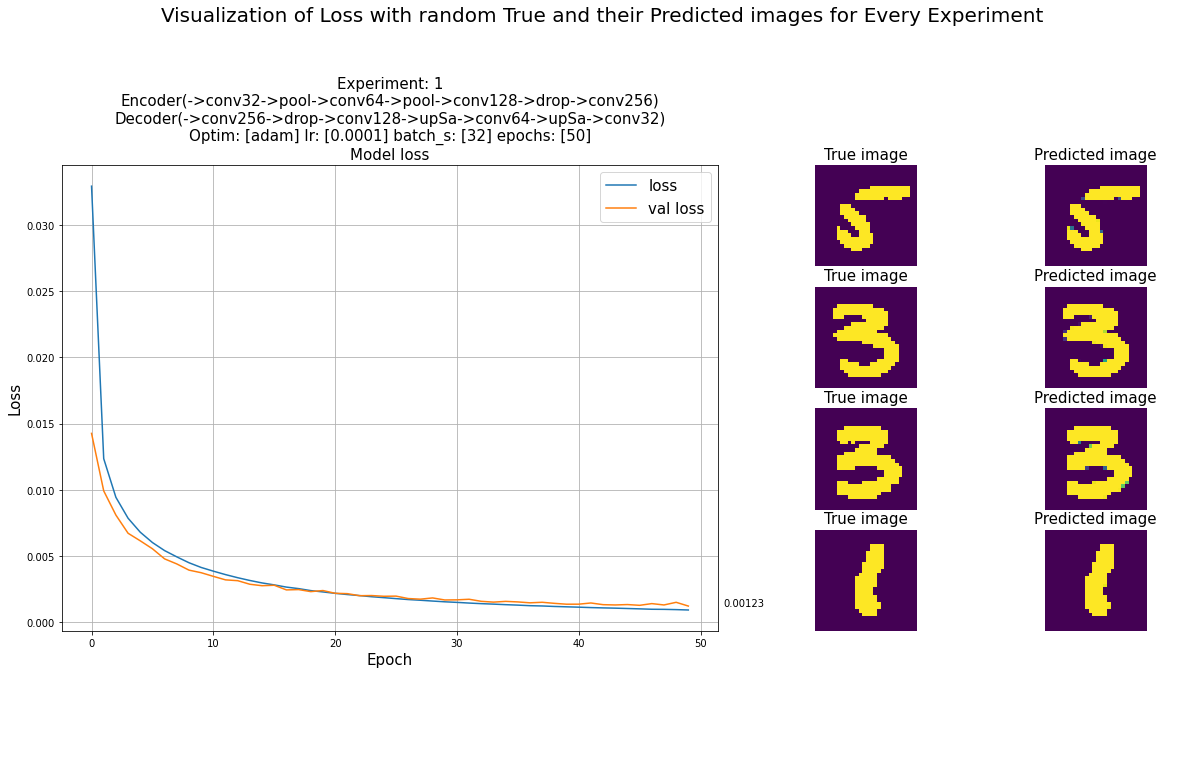

In [24]:
large_model_info = {"encoder_layers" : [["conv", 32, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 64, (3,3)],
                                        ["pool", (2,2)],
                                        ["conv", 128, (3,3)],
                                        ["drop", 0.1],
                                        ["conv", 256, (3,3)]]
                    ,
                    "bottleneck_layer": ["dense", 200]
                    ,
                    "decoder_layers" :  [["conv", 256, (3,3)],
                                         ["drop", 0.1],
                                         ["conv", 128, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 64, (3,3)],
                                         ["upSample", (2,2)],
                                         ["conv", 32, (3,3)]]
                    ,
                    "optimizer" :       ["adam", 0.0001]
                    ,
                    "batch_size":       32
                    ,
                    "epochs" :          50
                    }
# get model
autoencoder_200 = get_Autoencoder(large_model_info, input_shape)
# train it
large_model_history = train_Autoencoder(autoencoder_200, large_model_info, train_X)
# save it
autoencoder_200.save("autoencoder_200.h5")
# plot it
_ = autoencoder_visualization([large_model_history], test_X)